## Tutorial: Explore your own Fitbit data!

January 21, 2018

### The goal of this project was for me to practice:
1. downloading data from an API 
2. working with new types of data formats (e.g., json)
3. visualizations
4. basic statistics in Python.

#### Also, as a new Fitbit owner (Dec. 2017), previous collegiate athlete, and fitness lover, I was incredibly curious about my own data!

### The general outline of this notebook is as follows:
 1. Import or install necessary libraries
 2. Read in and visualize data sets (heart rate, sleep, steps)
 3. Analyses!
 4. Next steps
 
In order to get my Fitbit data, I first had to set up a Fitbit API. Then, I ran a separate script - available here.

###  1. Import or install necessary libraries

In [1]:
#!pip install fitbit
#!pip install -r requirements/base.txt
#!pip install -r requirements/dev.txt
#!pip install -r requirements/test.txt
from time import sleep
import fitbit
import cherrypy
import requests
import json
import datetime
import scipy.stats
import pandas as pd
import numpy as np

# plotting
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Let's read in one file with heartrate data to check the format and see what the data looks like.

In [2]:
with open('heartrate/HR2017-12-23.json') as f:
    hr_dat_sample = json.loads(f.read())
hr_dat_sample

u'{"activities-heart":[{"customHeartRateZones":[],"dateTime":"2017-12-23","heartRateZones":[{"caloriesOut":1268.603,"max":96,"min":30,"minutes":1227,"name":"Out of Range"},{"caloriesOut":572.7827,"max":134,"min":96,"minutes":191,"name":"Fat Burn"},{"caloriesOut":54.5846,"max":163,"min":134,"minutes":9,"name":"Cardio"},{"caloriesOut":0,"max":220,"min":163,"minutes":0,"name":"Peak"}],"value":"83.45"}],"activities-heart-intraday":{"dataset":[{"time":"00:00:00","value":92},{"time":"00:00:03","value":92},{"time":"00:00:06","value":92},{"time":"00:00:09","value":92},{"time":"00:00:12","value":92},{"time":"00:00:15","value":92},{"time":"00:00:16","value":95},{"time":"00:00:17","value":89},{"time":"00:00:18","value":90},{"time":"00:00:19","value":91},{"time":"00:00:21","value":92},{"time":"00:00:22","value":93},{"time":"00:00:23","value":95},{"time":"00:00:24","value":96},{"time":"00:00:25","value":97},{"time":"00:00:26","value":98},{"time":"00:00:27","value":99},{"time":"00:00:28","value":101

#### That is crazy town output... let's parse the .json file so humans can read it!

In [3]:
parsed_json_hr_samp = json.loads(hr_dat_sample)
parsed_json_hr_samp

{u'activities-heart': [{u'customHeartRateZones': [],
   u'dateTime': u'2017-12-23',
   u'heartRateZones': [{u'caloriesOut': 1268.603,
     u'max': 96,
     u'min': 30,
     u'minutes': 1227,
     u'name': u'Out of Range'},
    {u'caloriesOut': 572.7827,
     u'max': 134,
     u'min': 96,
     u'minutes': 191,
     u'name': u'Fat Burn'},
    {u'caloriesOut': 54.5846,
     u'max': 163,
     u'min': 134,
     u'minutes': 9,
     u'name': u'Cardio'},
    {u'caloriesOut': 0,
     u'max': 220,
     u'min': 163,
     u'minutes': 0,
     u'name': u'Peak'}],
   u'value': u'83.45'}],
 u'activities-heart-intraday': {u'dataset': [{u'time': u'00:00:00',
    u'value': 92},
   {u'time': u'00:00:03', u'value': 92},
   {u'time': u'00:00:06', u'value': 92},
   {u'time': u'00:00:09', u'value': 92},
   {u'time': u'00:00:12', u'value': 92},
   {u'time': u'00:00:15', u'value': 92},
   {u'time': u'00:00:16', u'value': 95},
   {u'time': u'00:00:17', u'value': 89},
   {u'time': u'00:00:18', u'value': 90},
   {

In [4]:
list(parsed_json_hr_samp['activities-heart-intraday'].keys())

[u'datasetType', u'datasetInterval', u'dataset']

Much better. Now we can see the headings inside 'activities-heart-intraday'. 

## 2. Read in and visualize data

## Heart Rate

In [16]:
dates = pd.date_range('2017-12-23', '2018-01-25')
hrval = []

for date in dates:
    fname = 'heartrate/HR' + date.strftime('%Y-%m-%d') + '.json'
    with open(fname) as f:
        date_data = json.loads(f.read())
        
        data = pd.read_json(date_data, typ='series')
        hrval.append(data['activities-heart-intraday']['dataset'][1])

HR_df = pd.DataFrame(hrval,index = dates)
HR_df.columns = ['time', 'bpm']

In [17]:
HR_df.head()

,time,bpm
2017-12-23,00:00:03,92
2017-12-24,00:00:04,88
2017-12-25,00:00:03,94
2017-12-26,00:00:03,93
2017-12-27,00:00:03,74


This should be where the heart rate statistics are stored. Let's check.

In [18]:
stats = data['activities-heart-intraday']['dataset']
HR=pd.DataFrame(stats)
HR.head()

,time,value
0,00:00:01,68
1,00:00:02,69
2,00:00:05,70
3,00:00:08,70
4,00:00:11,69


Hooray! Alas, they are here. Let's rename the columns and plot data just to have a look.

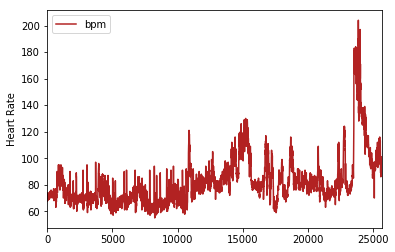

In [19]:
HR.columns = ['time', 'bpm']
HR.plot(color = "firebrick")
plt.ylabel('Heart Rate');

That's a lot of data... it's my heartrate for every few seconds for an entire day. 

Hmmmm... it looks like I went for a run or swim at some point!

My researcher instincts are coming out now... Must check for outliers and see the general range of heartrate values!

In [20]:
HR.describe()

,bpm
count,25694.000000
mean,82.025181
std,18.923871
min,55.000000
25%,70.000000
50%,78.000000
75%,87.000000
max,204.000000


## Sleep Data

Let's repeat the data structure exploration that we did with heartrate for sleep! This code should read in one sleep file, should get the highest level keys: 'summary' and 'sleep'


In [21]:
with open('sleep/sleep2017-12-23.json') as f:
    sleepdat = json.loads(f.read())
sleepdata = pd.read_json(sleepdat, typ='series')
sleepdata

sleep      [{u'logId': 16665472783, u'dateOfSleep': u'201...
summary    {u'totalTimeInBed': 547, u'stages': {u'light':...
dtype: object

In [38]:
parsed_json = json.loads(sleepdat)
print(json.dumps(parsed_json))

{"sleep": [{"logId": 16665472783, "dateOfSleep": "2017-12-23", "minutesToFallAsleep": 0, "awakeningsCount": 9, "minutesAwake": 19, "timeInBed": 547, "minutesAsleep": 524, "awakeDuration": 11, "efficiency": 97, "isMainSleep": true, "startTime": "2017-12-23T00:40:00.000", "restlessCount": 7, "duration": 32820000, "restlessDuration": 12, "minuteData": [{"value": "2", "dateTime": "00:40:00"}, {"value": "3", "dateTime": "00:41:00"}, {"value": "2", "dateTime": "00:42:00"}, {"value": "2", "dateTime": "00:43:00"}, {"value": "1", "dateTime": "00:44:00"}, {"value": "1", "dateTime": "00:45:00"}, {"value": "1", "dateTime": "00:46:00"}, {"value": "1", "dateTime": "00:47:00"}, {"value": "1", "dateTime": "00:48:00"}, {"value": "1", "dateTime": "00:49:00"}, {"value": "1", "dateTime": "00:50:00"}, {"value": "1", "dateTime": "00:51:00"}, {"value": "1", "dateTime": "00:52:00"}, {"value": "1", "dateTime": "00:53:00"}, {"value": "1", "dateTime": "00:54:00"}, {"value": "1", "dateTime": "00:55:00"}, {"value"

Let's parse this guy.

In [39]:
list(parsed_json['sleep'][0].keys())

[u'logId',
 u'dateOfSleep',
 u'minutesToFallAsleep',
 u'awakeningsCount',
 u'minutesAwake',
 u'timeInBed',
 u'minutesAsleep',
 u'awakeDuration',
 u'efficiency',
 u'isMainSleep',
 u'startTime',
 u'restlessCount',
 u'duration',
 u'restlessDuration',
 u'minuteData',
 u'endTime',
 u'awakeCount',
 u'minutesAfterWakeup']

Now we are ready to read in all the sleep files. I then concatonated the files using the .append command. Finally, I convert the data frame into a pandas data frame using the pd.DataFrame command. Boom.

In [40]:
sleepy = []
for date in dates:
    fname = 'sleep/sleep' + date.strftime('%Y-%m-%d') + '.json'
    with open(fname) as f:
        date_data_sleep = json.loads(f.read())
        datsleep = pd.read_json(date_data_sleep, typ='series')
        sleepy.append(datsleep['summary']['totalTimeInBed'])

sleepdf = pd.DataFrame(sleepy,index = dates) #use the date as the column row names
sleepdf.columns = ['hours'] #rename column
sleepdf['hours'] = sleepdf['hours']/60 # Turn minutes to hours

Time to see the beautiful new df!

In [41]:
sleepdf.head()

,hours
2017-12-23,9.116667
2017-12-24,9.250000
2017-12-25,8.683333
2017-12-26,9.966667
2017-12-27,7.500000


And again, check for outliers just in case. You never know. But, it all looks good.

In [42]:
sleepdf.describe()

,hours
count,34.000000
mean,8.486765
std,1.420336
min,4.966667
25%,7.587500
50%,8.383333
75%,9.312500
max,12.066667


Plot it out in a nice simple graph (ya basic). I should probably stick to a better sleep schedule.

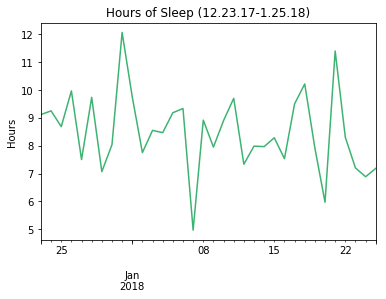

In [43]:
sleepdf['hours'].plot(color = "mediumseagreen")
plt.title('Hours of Sleep (12.23.17-1.25.18)')
plt.ylabel('Hours')
plt.show()

Let's plot the sleep data another way...how about a distribution?

By the way, what do you call a haunted distrubution?  A paranormal distribution. Ha! Sorry guys. 

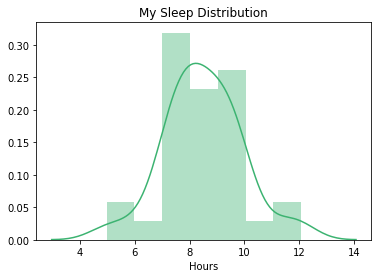

In [44]:
sns.distplot(sleepdf['hours'], color="mediumseagreen")
plt.title("My Sleep Distribution")
plt.xlabel("Hours")
plt.show()

Add column and labels for day of week, just as before.

In [45]:
sleepdf["day_of_week"] = sleepdf.index.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
sleepdf["day_name"] = sleepdf["day_of_week"].apply(lambda x: days[x])
sleepdf.head()

,hours,day_of_week,day_name
2017-12-23,9.116667,5,Saturday
2017-12-24,9.250000,6,Sunday
2017-12-25,8.683333,0,Monday
2017-12-26,9.966667,1,Tuesday
2017-12-27,7.500000,2,Wednesday


For kicks, we should probably check and officially see if we have an even amount of data per day (in case I forgot to put it on one night or the battery died). 

This is important if we want to trust the accuracy of our analyses related to days of the week! According to the plot, it's all pretty even, except for Friday. This is because I imported data before the 5th Friday.

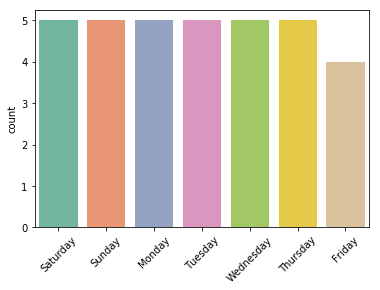

In [46]:
# Make a Bar Plot 
sns.countplot(x='day_name', data=sleepdf, palette = "Set2")
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

How does my sleep vary from day to day? Looks like Sunday is really variable.

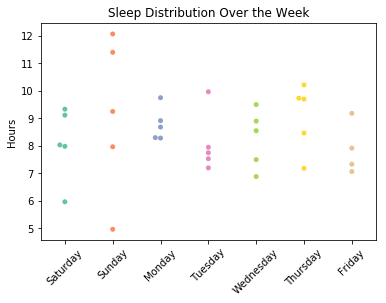

In [47]:
sns.swarmplot(x='day_name', y='hours', data=sleepdf,  palette = "Set2")
plt.xticks(rotation=45)
plt.title("Sleep Distribution Over the Week")
plt.ylabel("Hours")
plt.xlabel("")
plt.show()

For kicks, we should probably check and officially see if we have an even amount of data per day (in case I forgot to put it on one night or the battery died). This is important if we want to trust the accuracy of our analyses related to days of the week!

Another view- violin style!

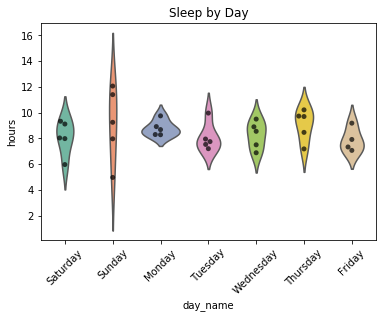

In [48]:
sns.violinplot(x='day_name',
               y='hours', 
               data=sleepdf, 
               inner=None, palette = 'Set2' ) # Remove the bars inside the violins

## plot the dots we see above over the violin plot.
sns.swarmplot(x='day_name',
               y='hours', 
              data=sleepdf, 
              color='k', 
              alpha=0.7)
 
# Set title with matplotlib
plt.title('Sleep by Day')
plt.xticks(rotation=45)
plt.show()

Okay, last sleep plot visual, for now. The graph below is more typical of something I would encounter in academia, and it also shows the standard errors of my sleep during each day. 

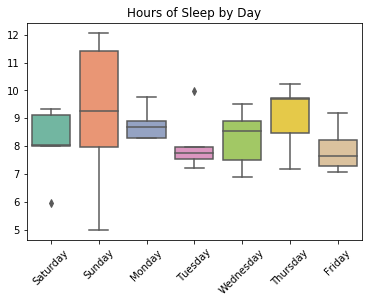

In [49]:
sns.boxplot(x = 'day_name', y = 'hours', data = sleepdf, palette = 'Set2')
plt.title('Hours of Sleep by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("")
plt.show()

## Step data 

Read it in. And check structure of .json file, it's a mystery. 

In [50]:
with open('steps/step2018-01-13.json') as f:
    step_data = json.loads(f.read())
stepsdata = pd.read_json(step_data, typ='series')
stepsdata

activities-steps    [{u'value': u'12721', u'dateTime': u'2018-01-1...
dtype: object

In [51]:
parsed_json = json.loads(step_data)
print(json.dumps(parsed_json))


{"activities-steps": [{"value": "12721", "dateTime": "2018-01-13"}, {"value": "9687", "dateTime": "2018-01-14"}, {"value": "12920", "dateTime": "2018-01-15"}, {"value": "5894", "dateTime": "2018-01-16"}, {"value": "8710", "dateTime": "2018-01-17"}, {"value": "14462", "dateTime": "2018-01-18"}, {"value": "6660", "dateTime": "2018-01-19"}, {"value": "10138", "dateTime": "2018-01-20"}, {"value": "8497", "dateTime": "2018-01-21"}, {"value": "10437", "dateTime": "2018-01-22"}, {"value": "9005", "dateTime": "2018-01-23"}, {"value": "6531", "dateTime": "2018-01-24"}, {"value": "10663", "dateTime": "2018-01-25"}]}


Get higher level key name(s).

In [52]:
list(parsed_json.keys())

[u'activities-steps']

In [53]:
dates = pd.date_range('2017-12-23', '2018-01-25')
steppers = []
for date in dates:
    fname = 'steps/step' + date.strftime('%Y-%m-%d') + '.json'
    with open(fname) as f:
        date_data = json.loads(f.read())
        
        stepsdata = pd.read_json(date_data, typ='series')
        steppers.append(stepsdata['activities-steps'][0]) # the zero indexes the first value

stepsdf = pd.DataFrame(steppers,index = dates) # use date as row index
stepsdf.columns = ['date','steps'] # rename columns

In [54]:
stepsdf.head()

,date,steps
2017-12-23,2017-12-23,4238
2017-12-24,2017-12-24,10776
2017-12-25,2017-12-25,4928
2017-12-26,2017-12-26,9468
2017-12-27,2017-12-27,7046


Add column for the day of week, just as before. 

In [55]:
stepsdf["day_of_week"] = stepsdf.index.weekday
stepsdf["day_name"] = stepsdf["day_of_week"].apply(lambda x: days[x])
#Have a look!
stepsdf.head()

,date,steps,day_of_week,day_name
2017-12-23,2017-12-23,4238,5,Saturday
2017-12-24,2017-12-24,10776,6,Sunday
2017-12-25,2017-12-25,4928,0,Monday
2017-12-26,2017-12-26,9468,1,Tuesday
2017-12-27,2017-12-27,7046,2,Wednesday


To perform any analyses or plot data, we need to convert steps column into a numeric type. Otherwise we get errors. We don't like errors.

In [56]:
stepsdf['steps'] = pd.to_numeric(stepsdf['steps'])
stepsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2017-12-23 to 2018-01-25
Freq: D
Data columns (total 4 columns):
date           34 non-null object
steps          34 non-null int64
day_of_week    34 non-null int64
day_name       34 non-null object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


Now it's numeric! Anything is pos-iiii-ble!

Anywho... let's see my step distribution.

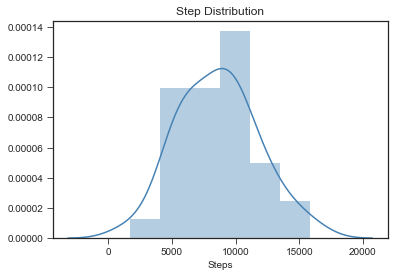

In [57]:
sns.set_style("ticks")
sns.distplot(stepsdf['steps'], color = 'steelblue')
plt.title("Step Distribution")
plt.xlabel("Steps") 
plt.show()

Violin time.

 I shall call it: "Friday: run or couch?"

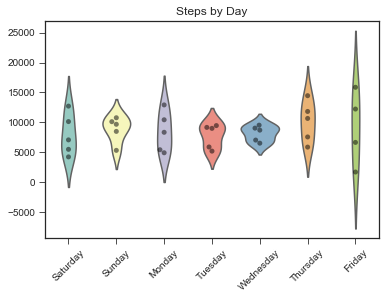

In [58]:
sns.violinplot(x='day_name',
               y='steps', 
               data=stepsdf, 
               inner=None, palette="Set3" ) # Remove the bars inside the violins
            
## Overlay dots onto violins.
sns.swarmplot(x='day_name',
               y='steps', 
              data=stepsdf, 
              color='k',  #black dots
              alpha = 0.5)
plt.title('Steps by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("")
plt.show()

Boxplot - bam.

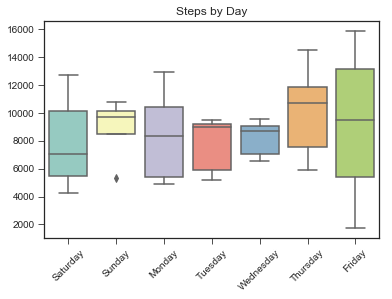

In [59]:
sns.boxplot(x = 'day_name', y = 'steps', data = stepsdf, palette="Set3")
plt.title('Steps by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("")
plt.show()

In [62]:
## Put hours into the right format
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.core import datetools
stepsdf['hours'] = sleepdf['hours'].values

## 3. Analyses (!!)

## Linear regression models

### Question 1: Am I more active on days after I get more sleep? 

I am operationalizing active to mean more steps per day.

In the model below, I am predicting my steps from the hours of sleep I got the night before. I am using an ordinary least squares regression model. Below is the code for the model, fitting the model, and displaying the results. 

First, create variable for the previous night's sleep and align it properly.

In [63]:
stepsdf["hours_prev"] = stepsdf.shift(1).hours
stepsdf.head()

,date,steps,day_of_week,day_name,hours,hours_prev
2017-12-23,2017-12-23,4238,5,Saturday,9.116667,NaN
2017-12-24,2017-12-24,10776,6,Sunday,9.250000,9.116667
2017-12-25,2017-12-25,4928,0,Monday,8.683333,9.250000
2017-12-26,2017-12-26,9468,1,Tuesday,9.966667,8.683333
2017-12-27,2017-12-27,7046,2,Wednesday,7.500000,9.966667


In [64]:
mod1 = smf.ols(formula = "steps ~ hours_prev", data = stepsdf).fit()
mod1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7624.5193,3320.426,2.296,0.029,852.465,1.44e+04
hours_prev,130.7044,384.278,0.340,0.736,-653.036,914.445


## Results:

So, we can see from the regression table that how many hours I slept the previous night ('hours_prev') does not predict the amount of steps I take the next day. This might be for a variety of reasons. First, I don't have a lot of data yet! I have only used my Fitbit for a month. Second, I am a graduate student, and my sleep is incredibly variable. Third- I love to be active! Even if I am tired, a run usually makes me feel better. Long story short is, we need more data!

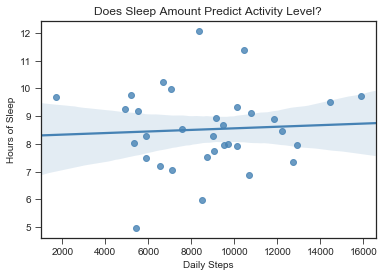

In [65]:
sns.regplot(x = stepsdf.steps, y = stepsdf.hours_prev, color = 'steelblue')
plt.xlabel("Daily Steps")
plt.ylabel("Hours of Sleep")
plt.title("Does Sleep Amount Predict Activity Level?")
plt.show()

That flat line shows that there is no linear relationship- it's flat as a pancake, which sounds amazing right now.

## Linear regression model  part 2

### Question 2: Do I sleep need more sleep the night after I don't get a lot of sleep? In other words, am I building up a sleep deficit?

In the model below, I am predicting the difference in amount of sleep I get from the hours of sleep I got the night before. I am using an ordinary least squares regression model. Below is the code for the model, fitting the model, and displaying the results. 

But first, we need to create a delta sleep variable to capture the difference in amount of sleep I got from the night before. 

In [66]:
stepsdf["hours_diff"] = stepsdf.hours - stepsdf.hours_prev
stepsdf.head()

,date,steps,day_of_week,day_name,hours,hours_prev,hours_diff
2017-12-23,2017-12-23,4238,5,Saturday,9.116667,NaN,NaN
2017-12-24,2017-12-24,10776,6,Sunday,9.250000,9.116667,0.133333
2017-12-25,2017-12-25,4928,0,Monday,8.683333,9.250000,-0.566667
2017-12-26,2017-12-26,9468,1,Tuesday,9.966667,8.683333,1.283333
2017-12-27,2017-12-27,7046,2,Wednesday,7.500000,9.966667,-2.466667


In [67]:
mod2 = smf.ols(formula = 'hours_diff ~ hours_prev', data = stepsdf).fit()
mod2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.4319,1.558,6.054,0.000,6.254,12.610
hours_prev,-1.1131,0.180,-6.173,0.000,-1.481,-0.745


## Results:

The regression table shows that how many hours I slept the previous night ('hours_prev') negatively predicts the difference in amount of sleep I get the next day. Put more simply, this means that if I get a good night's sleep, the next night, I don't need as much sleep. Conversely, if I don't get a lot of sleep, the next night, I make up for it by sleeping longer.

To make this finding easier to digest, let us visualize the relationship!

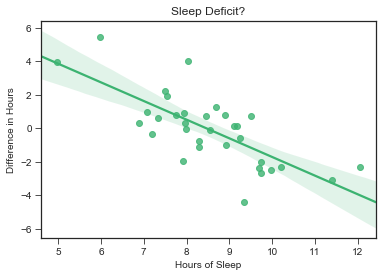

In [68]:
# Plot how much more I slept each night vs. amount slept night before
sns.regplot(x = stepsdf.hours_prev, y = stepsdf.hours_diff, color = "mediumseagreen")
plt.title("Sleep Deficit?")
plt.ylabel("Difference in Hours")
plt.xlabel("Hours of Sleep")
plt.show()

Poof! Here is that negtative linear relationship we saw in our regression table.

## 4. Next steps

In sum, we have imported data using Fitbit's API, worked with .json data, visualized our data, and we ran two linear regressions. We found that my activity level is dependent from how much sleep I get and that I built up a sleep deficit over time. Phew!! 

What I would like to do next is collect more data! I would also like to create some interactive visuals and run some more sophisticated models on my data. Finally, I would like to explore my heart rate more. The closer I get to defending my dissertation, the higher it seems to get. Should be fun to test if that is statistically significant! :) 

### If you have any suggestions on how I can improve, sources that may help improve my code, or comments/questions, please let me know! I am using this space to share and learn. 

Thanks!!